# Frequency and Time-Domain Analysis of Acoustic Signals

## Objective
The goal of this project is to analyze and identify moving parts of a walking person, with the help of recorded acoustic signals using:

- Time-domain visualization
- Fast Fourier Transform (FFT)
- Short-Time Fourier Transform (STFT)

The analysis helps identify dominant frequencies and observe how the signal evolves over time.

## Tools & Libraries
- NumPy
- Pandas
- SciPy
- Matplotlib


## Environment Setup
Import the required libraries for numerical computing, data handling, signal processing, and plotting.


In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib as mpl

from matplotlib import pyplot as plt, colors
from numpy.fft import fft
from scipy.signal import stft


plt.rcParams["figure.dpi"] = 120
plt.rcParams["savefig.dpi"] = 150

mpl.rcParams['axes.labelpad'] = 15

## Data Loading and Preprocessing

The dataset contains recorded signals exported from a measurement device.
The data uses semicolon separators and European decimal format (comma instead of dot).

Steps:
1. Read CSV file Skipping the first 15 header rows
2. Rename columns
3. Convert strings to float
4. Clean decimal format

In [2]:
# Load the CSV file
df = pd.read_csv("Recording.csv", sep=";", skiprows=15, header=None)

# Renaming columns
column_names = ["Time (s)", "Signal_1 (Pa)", "Signal_3 (Pa)", "Signal_2 (Pa)", "Signal_4 (Pa)"]
signals = ["Signal_1 (Pa)", "Signal_3 (Pa)", "Signal_2 (Pa)", "Signal_4 (Pa)"]
graph_colors = ["blue", "red", "green", "yellow"]

df.columns = column_names

new_df = pd.DataFrame()

for col in column_names:
    col_list = df[col].astype(str).iloc[1:].tolist()
    # Replace comma decimal with dot and convert to float
    new_list = [round(float(value.replace(",", ".")), 6) for value in col_list]
    new_df[col] = new_list

new_df.head(10)

,Time (s),Signal_1 (Pa),Signal_3 (Pa),Signal_2 (Pa),Signal_4 (Pa)
0,0.000000,0.002504,0.012841,0.009246,-0.010629
1,0.000015,0.014114,0.011715,0.007320,0.019674
2,0.000031,0.035967,0.011489,0.020611,0.010629
3,0.000046,0.026406,0.014869,0.024079,-0.018770
4,0.000061,0.005236,0.016896,0.010595,-0.011985
5,0.000076,0.014569,0.016446,0.006935,0.018996
6,0.000092,0.037333,0.014869,0.020804,0.014699
7,0.000107,0.028910,0.014418,0.023116,-0.019674
8,0.000122,0.003642,0.011489,0.010017,-0.019222
9,0.000137,0.010699,0.010588,0.004238,0.014473


## Time-Domain Signal Analysis

Visualization of the acoustic pressure signals in the time domain to understand waveform shape and amplitude behavior. Each signal is displayed in its own subplot over the same 0.05 s window.


In [3]:
# Displays graphs as subplot
def plot_subplot(sup_title: str, x_axis: np.ndarray, y_axis: List[np.ndarray], 
                 signal_name: List[str], graph_color: List[str],
                 x_label: str = None, y_label: str = None,
                 sharex: bool = True, figsize=(11,7)):
    fig, axs = plt.subplots(2, 2, figsize=figsize, sharex=sharex)
    plt.subplots_adjust(hspace=0.3)
    fig.suptitle(sup_title, fontsize=12, fontweight='bold')

    count = 0
    for i in range(2):
        for j in range(2):
            axs[i, j].plot(x_axis, y_axis[count], color=graph_color[count])
            axs[i, j].set_title(signal_name[count])
            axs[i, j].grid(True, alpha=0.3)
            count += 1

    # Global (framing) labels
    fig.add_subplot(1, 1, 1, frame_on=False)
    plt.tick_params(labelcolor="none", bottom=False, left=False)
    if x_label:
        plt.xlabel(x_label)
    if y_label:
        plt.ylabel(y_label)
    return fig, axs

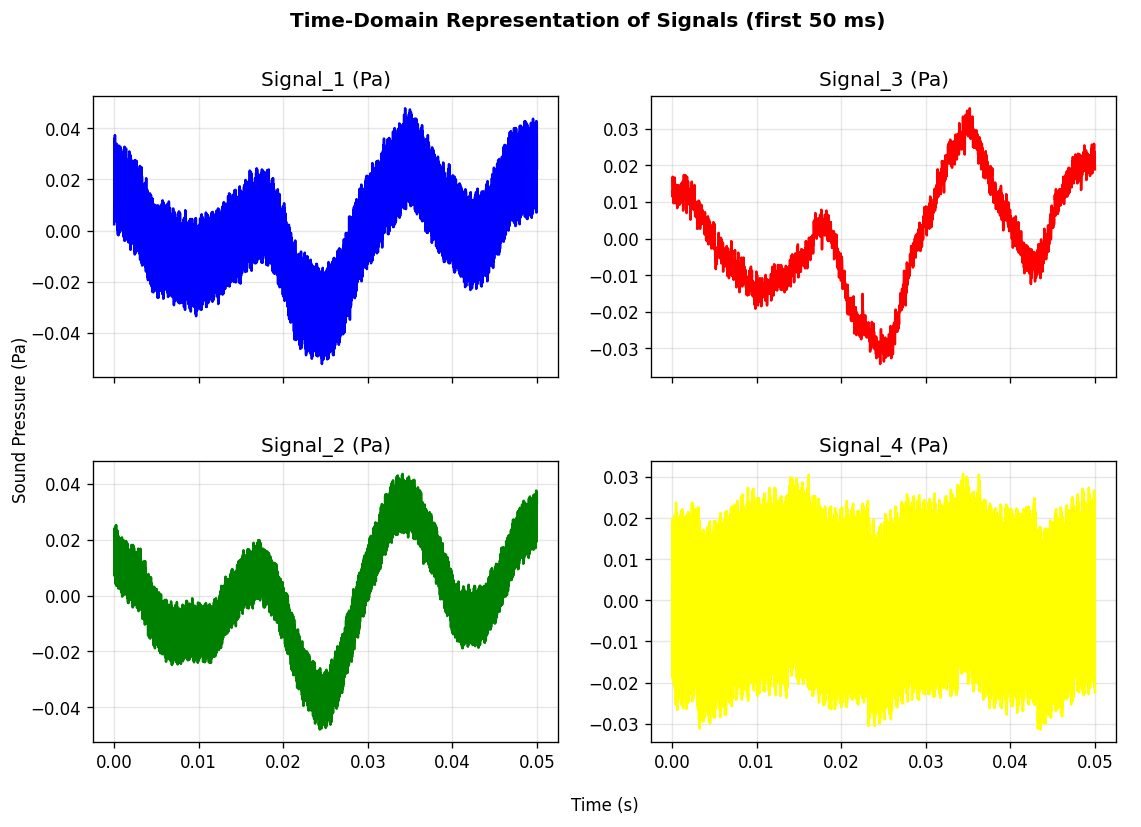

In [4]:
# Reduce dataset to first 0.05 seconds
reduced_df = new_df[new_df['Time (s)'] <= 0.05]

reduced_df_list = [reduced_df['Signal_1 (Pa)'], reduced_df['Signal_3 (Pa)'],
                   reduced_df['Signal_2 (Pa)'], reduced_df['Signal_4 (Pa)']]

fig, axs = plot_subplot(
    "Time-Domain Representation of Signals (first 50 ms)",
    reduced_df['Time (s)'], reduced_df_list, signals, graph_colors,
    x_label='Time (s)', y_label='Sound Pressure (Pa)'
)

plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
plt.savefig("Time-Domain Representation of Signals (first 50 ms).png")

### Interpretation

The signals appears distorted due to the huge amount of recorded data and also due presence of environmental noise in the testing room. The signals however maintained a sinusoidal shape. Signal 4 represents the transmitted sinusoidal signal.


## Combined view of time domain analysis


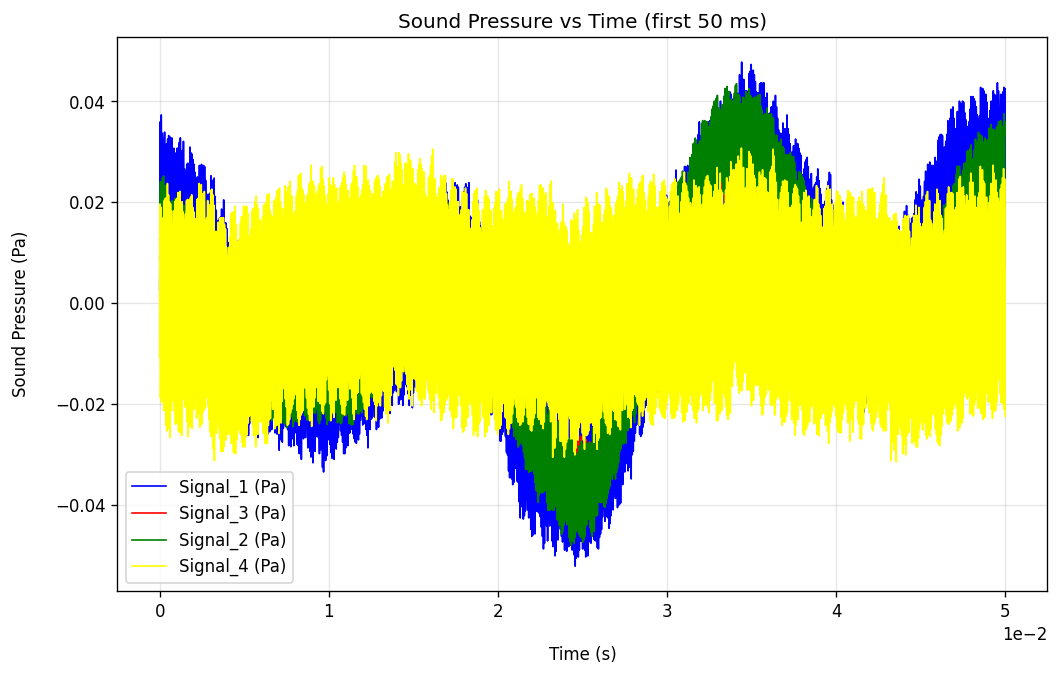

In [5]:
plt.figure(figsize=(10, 6))

for a in range(len(signals)):
    plt.plot(reduced_df['Time (s)'], reduced_df[signals[a]], color=graph_colors[a],
             linewidth=1, label=signals[a])

plt.xlabel('Time (s)')
plt.ylabel('Sound Pressure (Pa)')
plt.legend(loc="best")
plt.grid(True, alpha=0.3)
plt.title('Sound Pressure vs Time (first 50 ms)')
plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
plt.savefig("Combined Time-Domain Representation of Signals (first 50 ms).png")

## Frequency Domain Analysis using Fast Fourier Transform (FFT)

The Fast Fourier Transform (FFT) converts the signal from time domain to frequency domain.

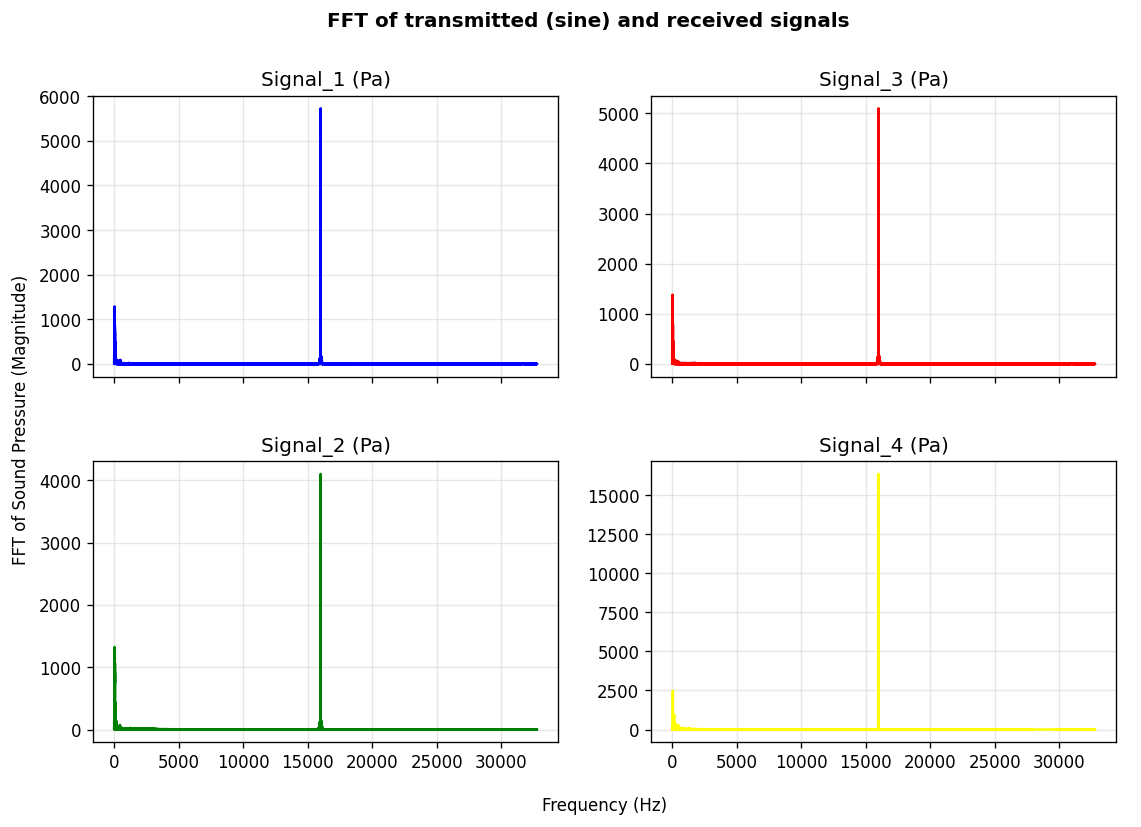

In [6]:
# Sampling frequency (Hz)
fs = 65536

# Number of samples
N = len(new_df)

# Frequency vector (one-sided)
ff = scipy.fftpack.fftfreq(N, 1/fs)[:N//2]

# Compute FFT magnitudes for each signal (one-sided)
fft_list = []
for signal in signals:
    fast_fourier_transform = fft(new_df[signal])
    fft_list.append(np.abs(fast_fourier_transform)[:N//2])

# Plot FFTs
fig, axs = plot_subplot(
    "FFT of transmitted (sine) and received signals",
    ff, fft_list, signals, graph_colors,
    x_label='Frequency (Hz)', y_label='FFT of Sound Pressure (Magnitude)'
)

plt.savefig("FFT of transmitted (sine) and received signals.png")

### Interpretation

The fast fourier transform of sine signal is a spectrum centered at 16000 Hz, corresponding to the centre frequency of the transmitted signal.

## Time-Frequency Analysis using Short Time Fourier Transform (STFT)

Unlike FFT, STFT shows how frequency components change over time. Compute the Short-Time Fourier Transform (STFT) for `Signal_1` using a 8192-sample Hann window with 4096-sample overlap, then plot the magnitude spectrogram.

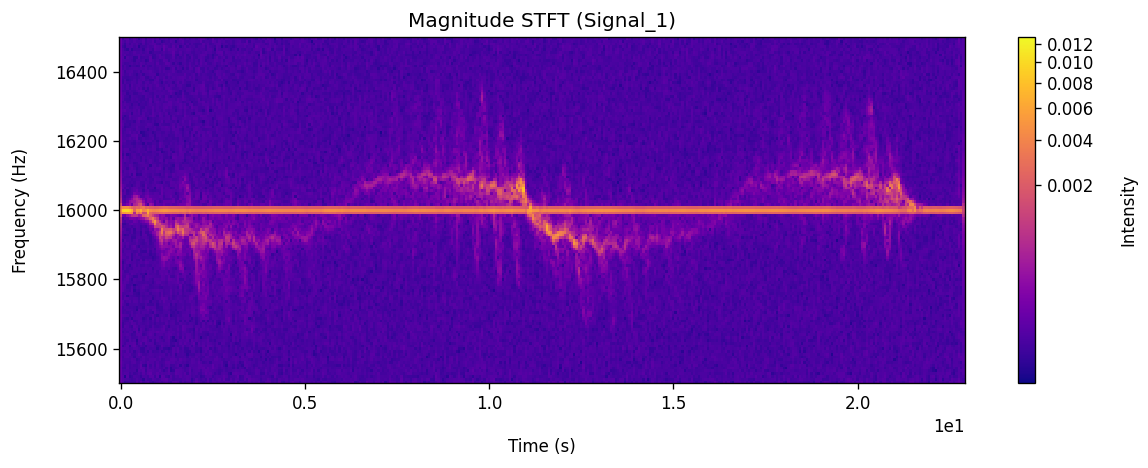

In [7]:
# Sampling frequency (Hz)
fs = 65536

# Compute STFT
f, t, Zxx = stft(new_df["Signal_1 (Pa)"], fs=fs, nperseg=8192, noverlap=4096, window='hann')

plt.figure(figsize=(10, 4))
plt.pcolormesh(t, f, np.abs(Zxx), norm=colors.PowerNorm(gamma=0.3), cmap=plt.get_cmap("plasma"))
plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

plt.ylim([15500, 16500])
plt.title('Magnitude STFT (Signal_1)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Intensity')
plt.tight_layout()
plt.savefig("STFT of Signal_1.png")

## Conclusion

The resulting spectrum represents the received signal from a walking person. Areas with high intensity are reflected signals from large surface areas of the body such as the torso since they reflect more signal. Areas with less intensity represent signal reflected from body parts such as hands, feets. These body parts have lower surface area and hence reflect less signal. Also, these body parts tend to swing more and faster than other body parts.